# Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1)

(-16.782601757627035, 18.7502638347748)

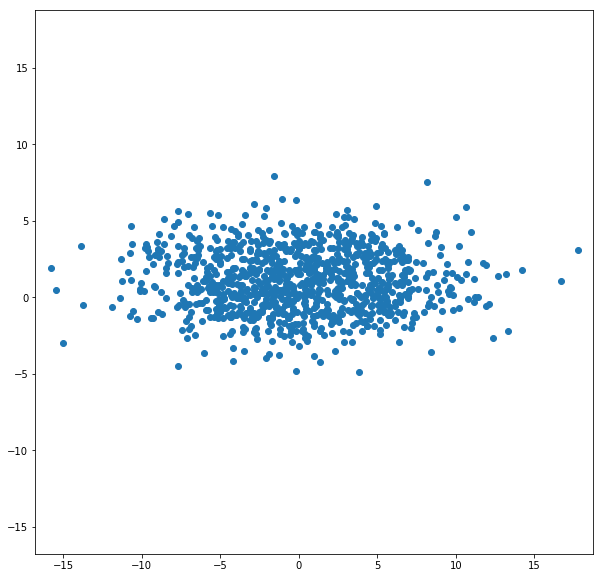

In [17]:
A = (np.random.normal(0, 5, 1000)).reshape(-1, 1)
B = (np.random.normal(1, 2, 1000)).reshape(-1, 1)
Max = max(np.max(A), np.max(B))
Min = min(np.min(A), np.min(B))
plt.figure(figsize=(10,10))
plt.scatter(A,B)
plt.xlim([Min-1, Max+1])
plt.ylim([Min-1, Max+1])

## 2)

as shown here: https://theclevermachine.wordpress.com/2013/03/30/the-statistical-whitening-transform/ to whiten the data first we should rotate the data and then scale it.

Using Matrix of Eigenvectors (E) we can calculate the rotation matrix $W_{D}$

$W_{D} = E^{T}$

In [18]:
X = np.concatenate([A, B], axis=1).T
Sigma = np.cov(X)
D, E = np.linalg.eig(Sigma)
Wd = E.T
Y = Wd @ X

(-16.79534043075532, 18.72859965326498)

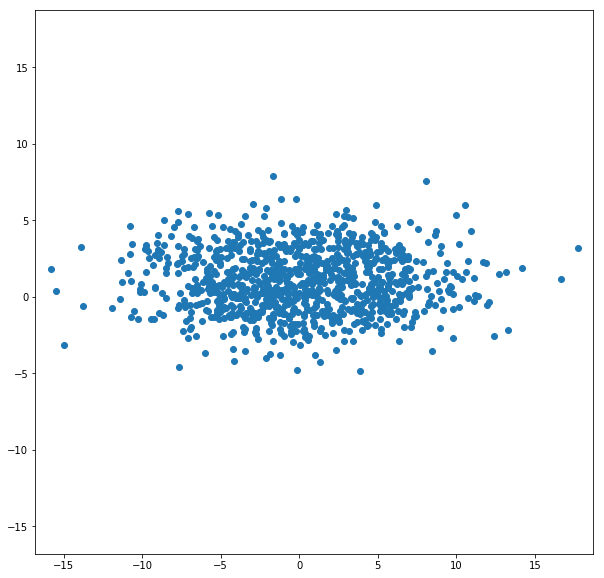

In [19]:
Ay = Y[0, :]
By = Y[1, :]
Max = max(np.max(Ay), np.max(By))
Min = min(np.min(Ay), np.min(By))
plt.figure(figsize=(10,10))
plt.scatter(Ay,By)
plt.xlim([Min-1, Max+1])
plt.ylim([Min-1, Max+1])

Then We have to perform a scaling on the data using diag matrix of eigenvalues ${D}$ we have:

${W_{w} = D^{-1/2} W_{D}}$  

(-4.13917488420061, 4.9077765662144035)

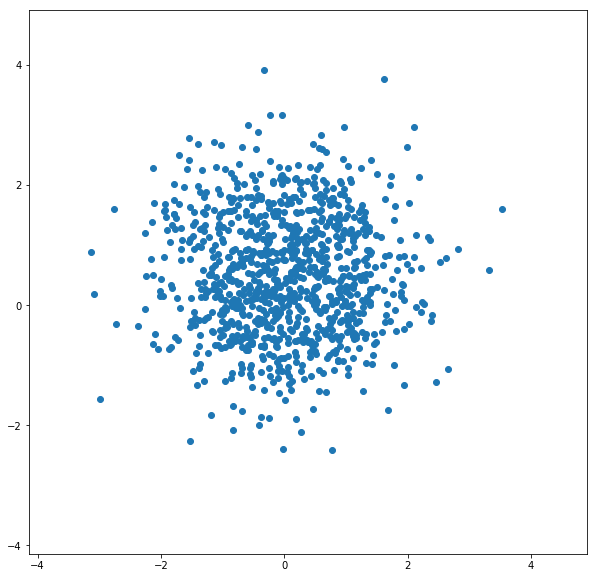

In [20]:
Ww = np.diag(D**(-0.5)) @ Wd
Y = Ww @ X
Ay = Y[0, :]
By = Y[1, :]
Max = max(np.max(Ay), np.max(By))
Min = min(np.min(Ay), np.min(By))
plt.figure(figsize=(10,10))
plt.scatter(Ay,By)
plt.xlim([Min-1, Max+1])
plt.ylim([Min-1, Max+1])

In [21]:
np.cov(Y)

array([[1.00000000e+00, 2.84501596e-17],
       [2.84501596e-17, 1.00000000e+00]])

# Question 5

In [23]:
data = np.loadtxt("train_data.csv", delimiter=',', unpack=True).T

In [24]:
Sigma = np.cov(data)
D, E = np.linalg.eig(Sigma)
Wd = E.T
Ww = np.diag(np.power(D, -.5)) @ Wd
Y = Ww @ data


In [25]:
print("Whitened data: Mean= ", Y.mean()," STD= ", Y.std() )

Whitened data: Mean=  -1.5137510104352714e-09  STD=  0.9999499987569885


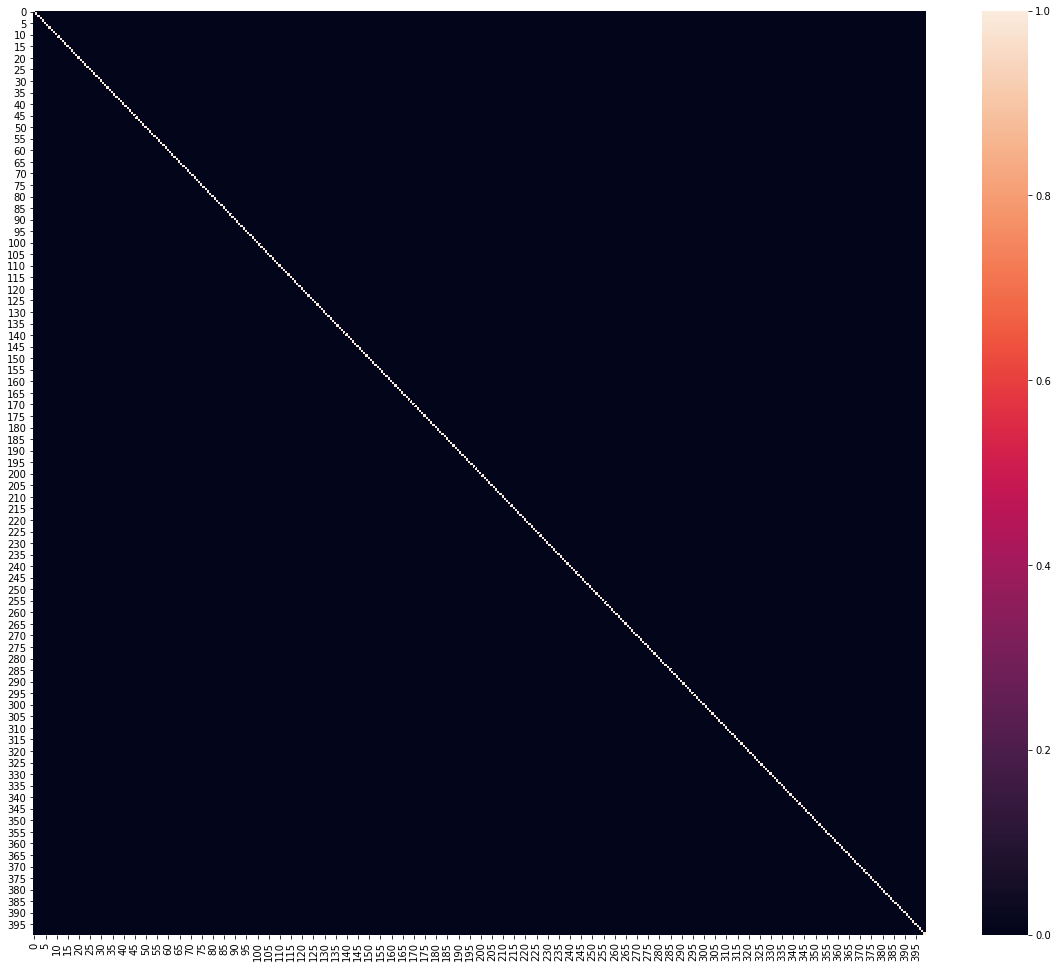

In [26]:
plt.figure(figsize=(20,17))
sns.heatmap(np.cov(Y))

As you can see data has been whitened.

Covariance Matrix is diagonal and identical.